In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
import requests
np.seterr(invalid='ignore')

link = "https://covid.ourworldindata.org/data/ecdc/new_deaths.csv"
f = requests.get(link)

with open("deaths_new.csv","w+") as out:
    out.seek(0)
    out.write(f.text)
    out.truncate()

In [36]:
deaths=pd.read_csv("deaths_new.csv")

deaths_old=deaths.drop(deaths.index[260-7:])
average_period=7
total_deaths=deaths.cumsum(axis=0)
rolling_average=deaths.rolling(average_period).mean()

average_period=30

average_deaths=pd.read_csv("5YearDeaths.csv")
average_deaths.loc[:,'Total'] = average_deaths.sum(axis=1)
average_deaths['Rolling Average'] = average_deaths['Total'].rolling(average_period).mean()
average_deaths['Rolling ST Dev'] = average_deaths['Total'].rolling(average_period).std()
average_deaths['Rolling ST Dev 30 Before'] = average_deaths['Total'].rolling(average_period).std().shift(average_period)
average_deaths['Rolling ST Dev ratio']=average_deaths["Rolling ST Dev"]/average_deaths["Rolling ST Dev 30 Before"]


In [37]:
non_winter_average_deaths=1378
prop_of_covid_would_be_winter=.5
winter_mortality=average_deaths.drop(average_deaths.index[:122-30-30-23]).drop(average_deaths.index[122-30-30-23+51+30:])
winter_mortality["Excess"]=winter_mortality["Rolling Average"]-non_winter_average_deaths+114-1.366667+32-30
winter_mortality["Excess Adjusted"]=winter_mortality["Excess"].apply(lambda x : x -x*prop_of_covid_would_be_winter*total_deaths["United Kingdom"][260-7]/winter_mortality["Excess"].sum()) 
total_winter_mortality=winter_mortality.cumsum(axis=0)

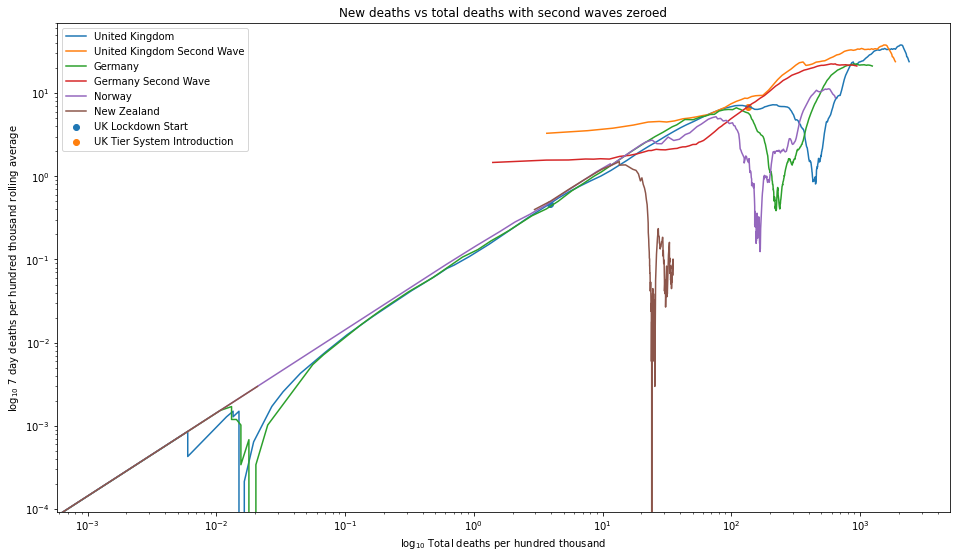

In [38]:
plt.rcParams["figure.figsize"] = (16,9)

plt.plot((np.divide(deaths["United Kingdom"].cumsum(axis=0).astype(str).astype(int).to_numpy(),668)),(np.divide(rolling_average["United Kingdom"].astype(str).astype(float).to_numpy(),668)))
plt.plot((np.divide(deaths["United Kingdom"].drop(deaths.index[:260-7]).cumsum(axis=0).astype(str).astype(int).to_numpy(),668)),(np.divide(rolling_average["United Kingdom"].drop(deaths.index[:260-7]).astype(str).astype(float).to_numpy(),668)))

plt.plot((np.divide(total_deaths["Germany"].astype(str).astype(int).to_numpy(),839)),(np.divide(rolling_average["Germany"].astype(str).astype(float).to_numpy(),839)))
plt.plot((np.divide(deaths["Germany"].drop(deaths.index[0:260-7]).cumsum(axis=0).astype(str).astype(int).to_numpy(),839)),(np.divide(rolling_average["Germany"].drop(deaths.index[0:260-7]).astype(str).astype(float).to_numpy(),839)))

plt.plot((np.divide(total_deaths["Norway"].astype(str).astype(int).to_numpy(),54)),(np.divide(rolling_average["Norway"].astype(str).astype(float).to_numpy(),54)))
plt.plot((np.divide(total_deaths["New Zealand"].astype(str).astype(float).to_numpy(),48)),(np.divide(rolling_average["New Zealand"].astype(str).astype(float).to_numpy(),48)))
plt.scatter((np.divide(deaths["United Kingdom"].cumsum(axis=0).astype(str).astype(int).to_numpy()[76],668)),(np.divide(rolling_average["United Kingdom"].astype(str).astype(float).to_numpy()[76],668)))
plt.scatter((np.divide(deaths["United Kingdom"].cumsum(axis=0).astype(str).astype(int).to_numpy()[76+28],668)),(np.divide(rolling_average["United Kingdom"].astype(str).astype(float).to_numpy()[76+28],668)))

china_dip=110

plt.xscale('log')
plt.yscale('log')
plt.xlabel("$\log_{10}$ Total deaths per hundred thousand")
plt.ylabel("$\log_{10}$ 7 day deaths per hundred thousand rolling average")
plt.title("New deaths vs total deaths with second waves zeroed")

plt.legend(["United Kingdom","United Kingdom Second Wave","Germany","Germany Second Wave","Norway","New Zealand","UK Lockdown Start","UK Tier System Introduction"])

(array([-2.17362138e-25,  1.39344268e-22, -3.97359271e-20,  6.57977669e-18,
       -6.86322766e-16,  4.44494787e-14, -1.40702673e-12, -3.23380732e-11,
        6.31140320e-09, -3.69154858e-07,  1.31050650e-05, -3.11300685e-04,
        5.01360533e-03, -5.35348190e-02,  3.60434350e-01, -1.41262693e+00,
        2.94170631e+00, -2.51601794e+00,  2.15633216e+00]), array([41.9774724]), 19, array([4.07718397e+00, 1.38118440e+00, 6.28653708e-01, 2.55623277e-01,
       8.72131031e-02, 2.62893581e-02, 7.15778261e-03, 1.77552680e-03,
       4.02656655e-04, 8.35358409e-05, 1.58300738e-05, 2.73042995e-06,
       4.26189560e-07, 5.96800539e-08, 7.40189001e-09, 7.97433300e-10,
       7.23049889e-11, 5.20452567e-12, 2.57606533e-13]), 1.7985612998927536e-14)


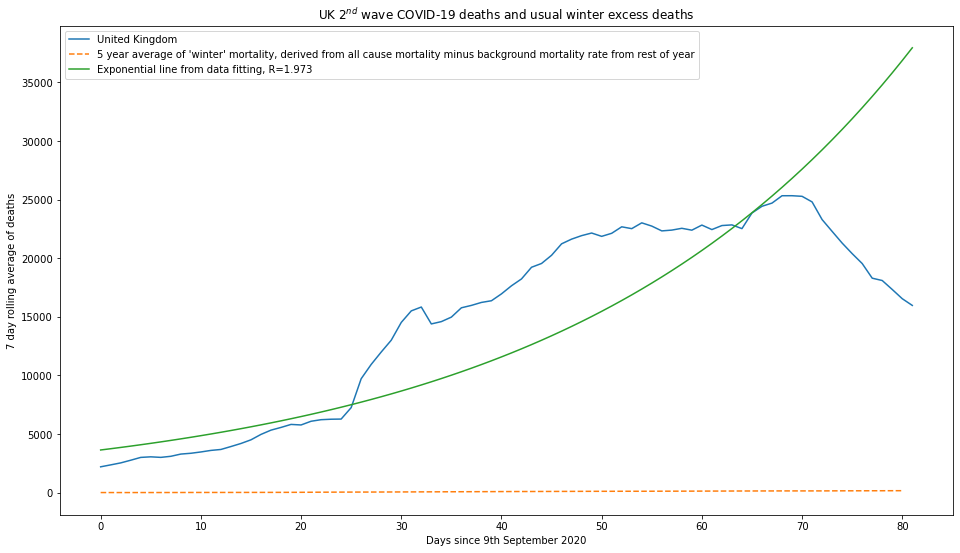

In [39]:
plt.rcParams["figure.figsize"] = (16,9)

plt.plot((np.divide(rolling_average["United Kingdom"].drop(deaths.index[0:260-7]).astype(str).astype(float).to_numpy(),1)))

china_dip=110

plt.plot((np.divide(winter_mortality["Excess"].astype(str).astype(float).to_numpy(),1)),linestyle = '--')

plt.xlabel("Days since 9th September 2020")
plt.ylabel("7 day rolling average of deaths")
plt.title("UK $2^{nd}$ wave COVID-19 deaths and usual winter excess deaths")


y=np.log10(rolling_average["United Kingdom"].drop(deaths.index[0:260-7]).astype(str).astype(float).to_numpy())
x=range(0,len(y))

model1 = np.polyfit(x,y,1, full=True)
plt.plot(x,[pow(10,model1[0][1])*pow(10,model1[0][0]*n) for n in x])


y2=winter_mortality["Excess"].drop(winter_mortality.index[0:0]).astype(str).astype(float).to_numpy()
x2=range(0,len(y2))

model2 = np.polyfit(x2,y2,18,full=True)
predict=np.poly1d(model2[0])
print(model2)
#plt.yscale('log')
#plt.plot(x2,[predict(n) for n in x2])
plt.legend(["United Kingdom","5 year average of 'winter' mortality, derived from all cause mortality minus background mortality rate from rest of year","Exponential line from data fitting, R=%s"%round(model1[1][0],3),"Linear line from fit of winter data, R=%s"%round(model2[1][0],3),"UK Lockdown Start","UK Tier System Introduction","UK Average Winter Excess Mortality for this period"])#,"Italy","Italy Second Wave","France","France Second Wave"])"""

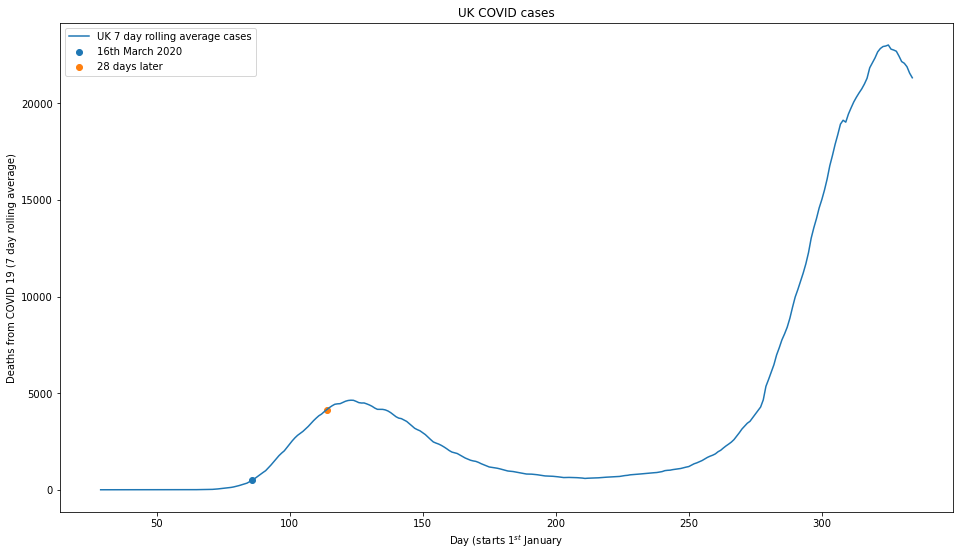

In [41]:
plt.plot(deaths["United Kingdom"].rolling(average_period).mean())
plt.scatter(86,deaths["United Kingdom"].rolling(average_period).mean()[86])
plt.scatter(86+28,deaths["United Kingdom"].rolling(average_period).mean()[86+28])
plt.ylabel("Deaths from COVID 19 (7 day rolling average)")
plt.xlabel("Day (starts $1^{st}$ January")
plt.title("UK COVID cases")
plt.legend(["UK 7 day rolling average deaths","16th March 2020","28 days later"])

Text(0.5, 1.0, 'UK COVID deaths with a log scaled y axis')

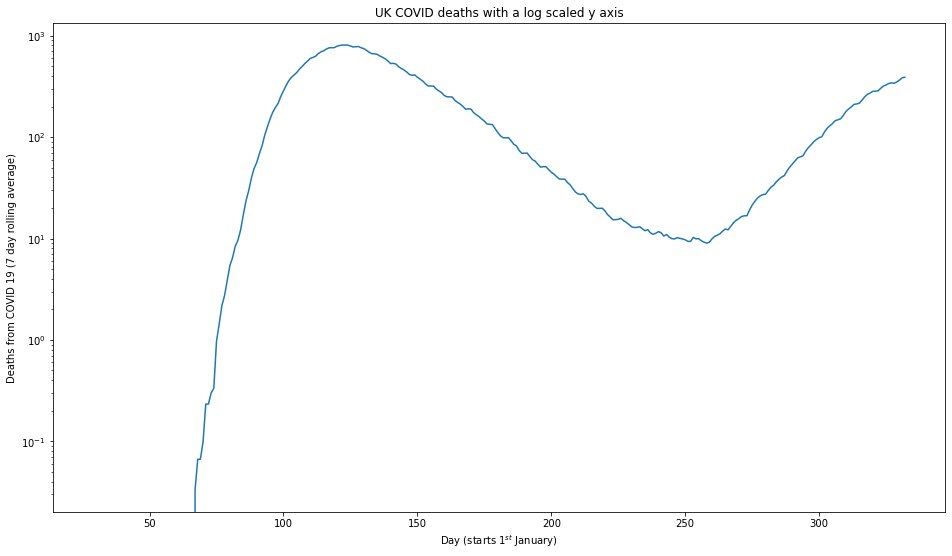

In [7]:
plt.plot(deaths["United Kingdom"].rolling(average_period).mean())
plt.yscale('log')
plt.ylabel("Deaths from COVID 19 (7 day rolling average)")
plt.xlabel("Day (starts $1^{st}$ January)")
plt.title("UK COVID deaths with a log scaled y axis")

In [8]:
print(deaths)

           date  World  Afghanistan  Albania  Algeria  Andorra  Angola  \
0    2019-12-31      0          0.0      NaN      0.0      NaN     NaN   
1    2020-01-01      0          0.0      NaN      0.0      NaN     NaN   
2    2020-01-02      0          0.0      NaN      0.0      NaN     NaN   
3    2020-01-03      0          0.0      NaN      0.0      NaN     NaN   
4    2020-01-04      0          0.0      NaN      0.0      NaN     NaN   
..          ...    ...          ...      ...      ...      ...     ...   
328  2020-11-23   7087          8.0     14.0     35.0      0.0     1.0   
329  2020-11-24   8976         17.0     17.0     19.0      0.0     0.0   
330  2020-11-25  12169         13.0     19.0     15.0      0.0     0.0   
331  2020-11-26  12552         12.0      8.0     20.0      0.0     1.0   
332  2020-11-27  10227          0.0     10.0     23.0      0.0     2.0   

     Anguilla  Antigua and Barbuda  Argentina  ...  Uzbekistan  Vanuatu  \
0         NaN                  NaN  

In [9]:
print(deaths["United Kingdom"].rolling(3).mean())

0             NaN
1             NaN
2        0.000000
3        0.000000
4        0.000000
          ...    
328    325.333333
329    314.666667
330    404.000000
331    594.000000
332    600.333333
Name: United Kingdom, Length: 333, dtype: float64


In [22]:
print(deaths["United Kingdom"].cumsum(axis=0).astype(str).astype(int).to_numpy())

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     1     2     2     3     7
     7     9    10    29    43    65    82   116   162   194   252   288
   364   512   703   884  1172  1464  1676  2050  2453  3125  3782  4518
  5274  5873  6440  7545  8575  9691 10813 11656 12313 13037 14113 14993
 16029 16942 18047 18479 19049 20273 21120 21802 22812 23627 23991 24311
 25280 26049 26683 27381 27965 28218 28490 29216 29863 30321 30900 31175
 31392 31579 32193 32640 32992 33342 33753 33820 33966 34466 34794 35067
 35358 35578 35957 36061 36192 36614 36957 37231 37385 37445 37531 37780
 38034 38164 38422 38565 38619 38666 38861 39025 39

0        0
1        0
2        0
3        0
4        0
      ... 
309    397
310    492
311    378
312    355
313    413
Name: United Kingdom, Length: 314, dtype: int64